# Synthesizers 1896 - 2024: A Dataset and Exploratory Insights

My main motivation for creating this dataset goes beyond a simple interest in electronic musical instruments. I have noticed that the availability of historical structured data on music technology and electronic music instruments is quite limited in well-known repositories like Kaggle and other popular sources. The set contains **hardware synthesizers, samplers, and drum machines**. It also includes some periphery like **synth controllers and sequencers**. However, it does not contain Eurorack, Buchla modules, FrackRack, 4U, etc., since I feel that these are subjects of their own and should be treated separately.
I have spent many hours compiling this dataset through a combination of automated processes, manual efforts, and extensive research, and I hope to provide a useful resource for researchers, musicians, and enthusiasts who wish to explore trends, patterns, and the history of the synthesizer landscape.

**This dataset is a work in progress**, and I aim to update it regularly with new releases and features.

I would like to thank **Marcel Krol** of [synth-db.com](http://synth-db.com) for allowing me to use his valuable information as a foundation for the entries related to the earlier years (mid-2000s and earlier) of this dataset.

In this notebook, I will conduct exploratory data analysis on the dataset to uncover insights and visualize key trends throughout the history of synthesizers. 
Through this exploration, I aim to contribute to a broader understanding of these instruments and their evolution over time.

[Watch a walkthrough video of the notebook here](https://youtu.be/Omj405hkOt0)




## The Attributes

- **Year**: The year the synthesizer was released.
- **Brand**: The manufacturer or brand name of the synthesizer.
- **Name**: The model name of the synthesizer.
- **Device**: The type of device (e.g., synthesizer, sampler).
- **Form Factor**: The form of the device, such as rack-mounted or keyboard.
- **Architecture**: The design of the synthesizer, such as analog or digital.
- **Synthesis**: The synthesis engine used (e.g., subtractive, FM).
- **Synthesis Details**: Specific details about the synthesis engine.
- **Polyphony**: The number of notes that can be played simultaneously.
- **Oscillators**: The number of oscillators available in the synthesizer.
- **Multitimbral**: Indicates if the synthesizer is Multitimbral.
- **Keys**: The number of keys on the synthesizer.
- **MIDI**:  Indicates if the synthesizer is MIDI capable.
- **Memory**: Indicates if the synthesizer has memory.
- **Key Type**: The type of keys (e.g., Keys, Pads).
- **Velocity**: Indicates if the synthesizer responds to key velocity.
- **Aftertouch**: Indicates the presence of aftertouch functionality.
- **Produced**: The years during which the synthesizer was in production.
- **Duration**: The length of time the synthesizer was produced.
- **Fame**: A qualitative measure of the synthesizer's popularity or influence.


In [1]:
#Import necessary stuff

import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import Polynomial
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import squarify
import re

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/iftah-og/Synthesizers-1896-2024/refs/heads/main/synthesizers_1896_2024.csv', index_col=0)

In [11]:
df.shape

(2368, 20)

In [12]:
df.head()

,Year,Brand,Name,Device,Form Factor,Architecture,Synthesis,Synthesis Details,Polyphony,Oscillators,Multitimbral,Keys,MIDI,Memory,Key type,Velocity,Aftertouch,Produced,Duration,Fame
0,1896,Thaddeus Cahill,Thaddeus Cahill - Telharmonium,Synth,Keys,Analog,Analog,Electromagnetic,84,408,0,153,False,False,Keys,False,False,1896 - 1914,18,0.182024
1,1905,Max Kohl AG,Max Kohl Ag - Helmholtz Sound Synthesiser,Synth,Desktop,Analog,Analog,Acoustic resonators,10,10,0,0,False,False,Keys,False,False,1905 - 1905,0,0.087696
2,1928,Lev Sergeyevich Termen,Lev Sergeyevich Termen - Theremin,Synth,Desktop,Analog,Analog,VCO,1,3,1,0,False,False,NaN,False,False,1928 - 1928,0,0.111132
3,1928,Maurice Martenot,Maurice Martenot - Ondes Martenot,Synth,Keys,Analog,Analog,VCO,1,1,0,72 / 84,False,False,Keys,False,False,1928 - 1988,60,0.237428
4,1930,Friedrich Trautwein,Friedrich Trautwein - Trautonium,Synth,Desktop,Analog,Analog,VCO,1,1,0,0,False,False,Wire,False,False,1930 - 1935,5,0.132743


# Releases over the years

As the KDE plot shows, there is little activity before the mid-1960s, which is expected. Afterward, we observe a notable increase in synthesizer releases, indicating clear trends.

In [6]:
print(f"Amount of synths released before 1970: {df[df['Year'] < 1970].shape[0]}")

Amount of synths released before 1970: 45


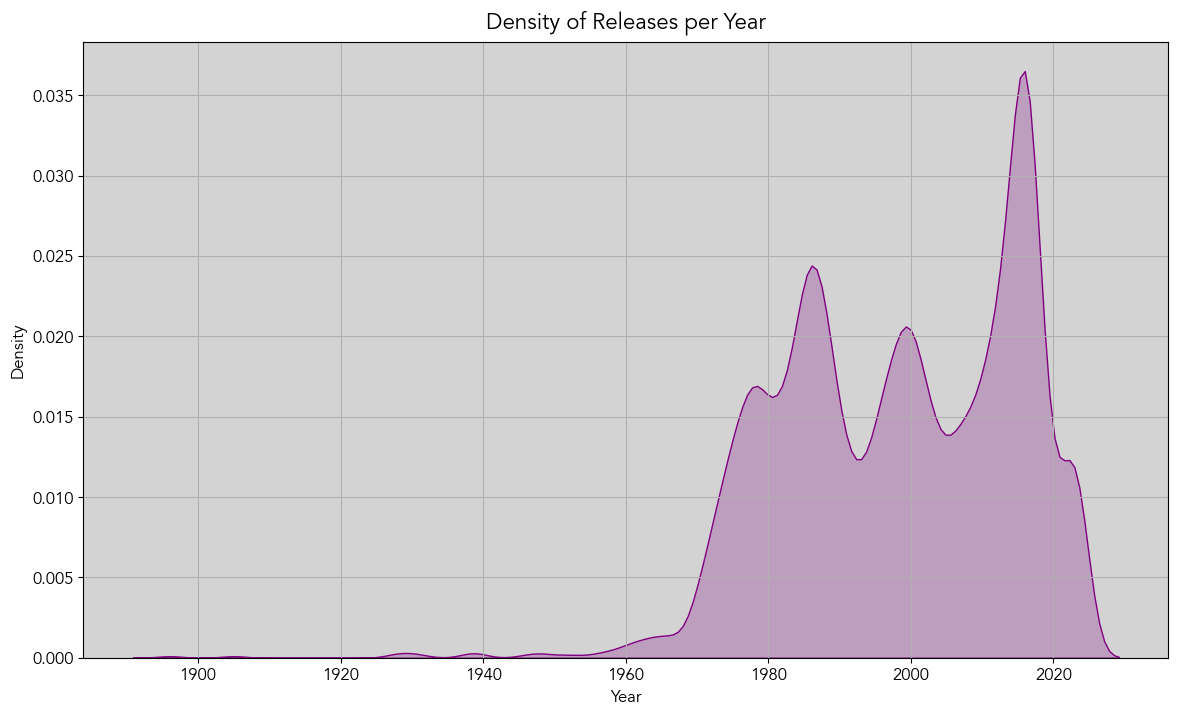

In [7]:
plt.figure(figsize=(14, 8))

plt.rcParams['font.family'] = 'Avenir'

# background color
ax = plt.gca()
ax.set_facecolor('lightgray')  

# Create plot
sns.kdeplot(df['Year'], fill=True, color='purple', bw_adjust=0.5)

plt.title('Density of Releases per Year', fontsize=16, pad=10)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

plt.show()

# Releases Per Year from 1970 onwards

Next, lets zoom in, and limit the range to 1970 onwards, with decades color-coded to provide a clearer visual distinction.

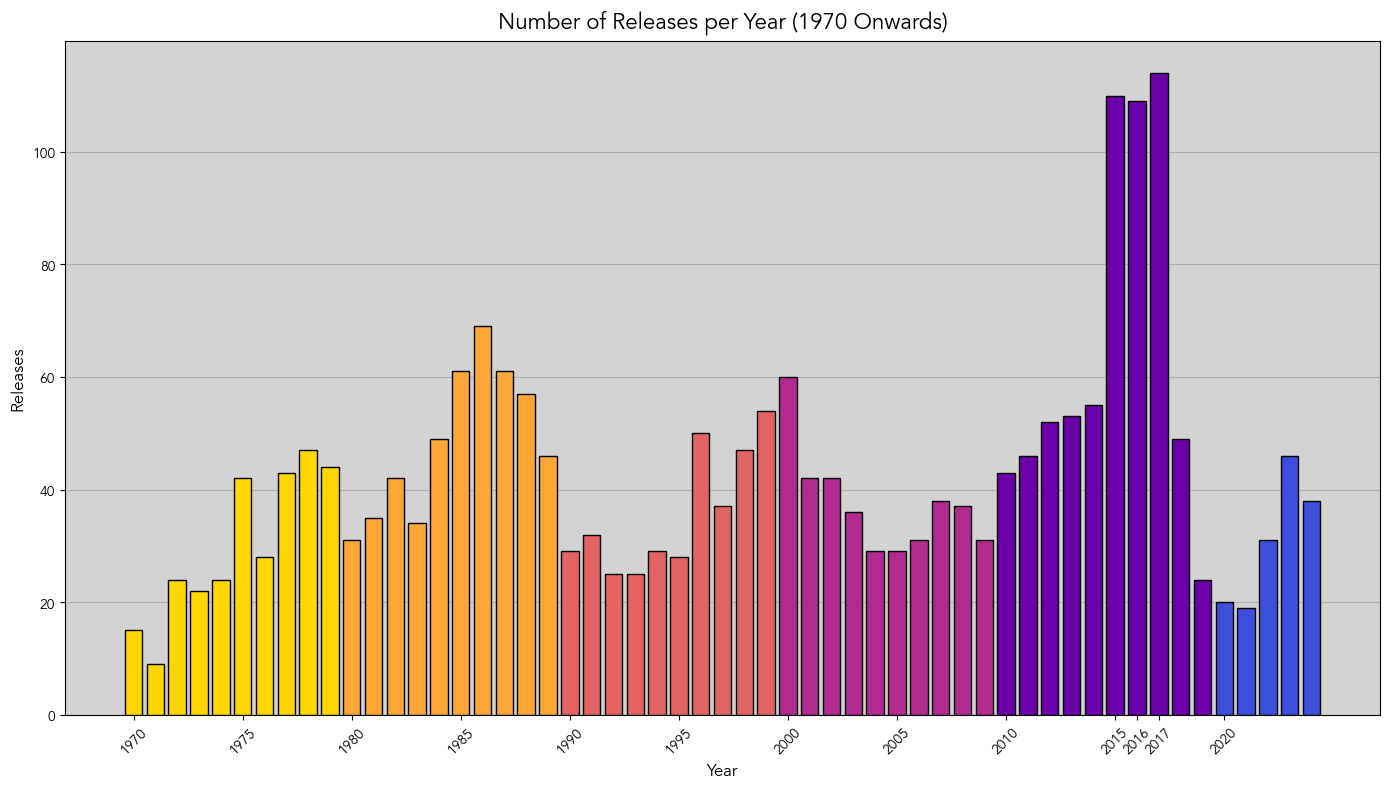

In [90]:
# Filter the DataFrame for relevant years
df_filtered = df[df['Year'] >= 1970]

# Count the occurrences of each year
year_counts = df_filtered['Year'].value_counts().sort_index()

# Define colors for each decade
def get_color(year):
    if year < 1980:
        return '#ffd700'   
    elif year < 1990:
        return '#fca636'  
    elif year < 2000:
        return '#e16462'  
    elif year < 2010:
        return '#b12a90'  
    elif year < 2020:
        return '#6a00a8'  
    else:
        return '#3c4fdc'  

# Get colors for the bars
colors = [get_color(year) for year in year_counts.index]

# Set font
plt.rcParams['font.family'] = 'Avenir'

# Create the figure and axis
plt.figure(figsize=(14, 8))
ax = plt.gca()
ax.set_facecolor('lightgray')  # Background color

# Bar plot
plt.grid(axis='y', zorder=0)  # Ensure grid is behind bars

# Create the bar plot with black edges
bars = plt.bar(year_counts.index, year_counts.values, color=colors, edgecolor='black', zorder=3)

# Ticks every 5 years, including 2016 and 2017
year_range = list(range(1970, year_counts.index.max() + 1, 5)) + [2016, 2017]
year_range = sorted(set(year_range))  #unique ticks

plt.xticks(ticks=year_range, labels=year_range, rotation=45)

plt.title('Number of Releases per Year (1970 Onwards)', fontsize=16, pad=10)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Releases', fontsize=12)
plt.tight_layout()
plt.show()

### <span style="color:#ffd700">1970s</span>: Early popularity driven by prog rock
The 1970s saw synthesizers gain popularity as they became central to the evolving sounds of progressive rock and electronic experimentation.

### <span style="color:#fca636">1980s</span>: Synthpop’s golden age  
In the 1980s, synthesizers became essential to pop music, defining the sound of the decade.

### <span style="color:#e16462">Early 1990s</span>: Decline due to the rise of guitar-driven music  
As alternative rock and grunge dominated the 1990s, synthesizer use declined, with guitars taking center stage in popular music.

### <span style="color:#e16462">Late 1990s</span>: Revival alongside digital evolution  
By the late 1990s, synthesizers experienced a revival, driven by advancements in digital technology and renewed interest in electronic music.

### <span style="color:#b12a90">Early 2000s</span>: Decline with the rise of software instruments  
With the introduction of powerful software instruments, the demand for hardware synthesizers declined in the early 2000s as musicians increasingly turned to software production tools.

### <span style="color:#6a00a8">2010s</span>: Mainstream dominance of electronic music and the hardware synth boom  
The 2010s marked a renewed interest in hardware synthesizers, driven by the mainstream rise of electronic music and a revival of analog gear among musicians, as everything became more affordable—what I refer to as the democratization of hardware synths

### <span style="color:#0d0887">2020s</span>: Impact of the pandemic and supply chain disruptions  
The 2020s faced challenges with synthesizer production due to the global pandemic and significant supply chain disruptions, affecting availability and development.




# Counts by Architecture

The architecture categorizes hardware entries as Analog, Digital, Hybrid, or Miscellaneous. Notably, there are **approximately 35% more digital releases** compared to analog releases.

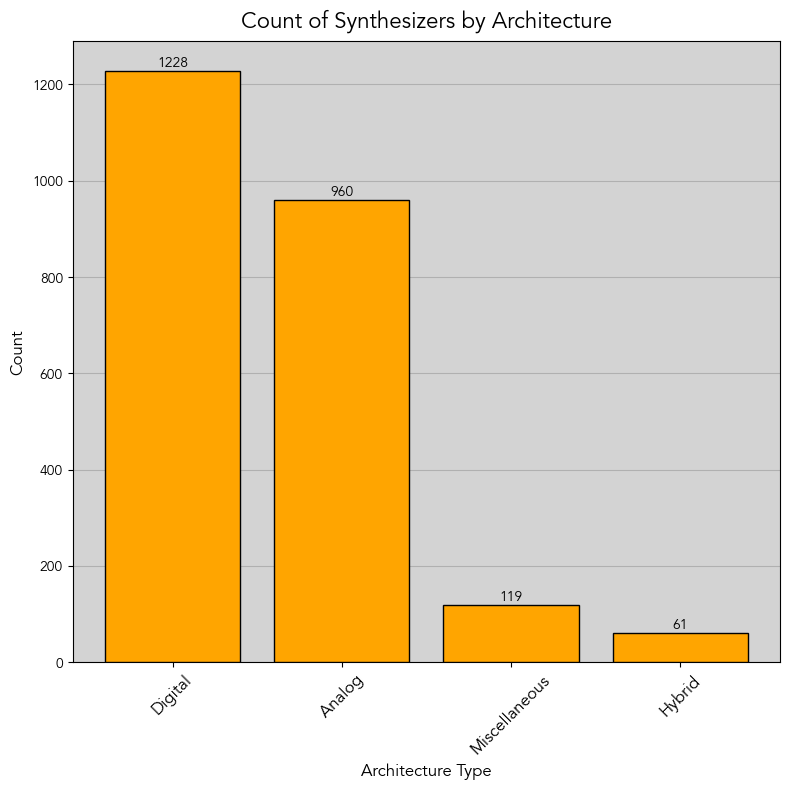

In [80]:
architecture_counts = df['Architecture'].value_counts()

# Set font 
plt.rcParams['font.family'] = 'Avenir'

# Create a bar plot
plt.figure(figsize=(8, 8))
bars = plt.bar(architecture_counts.index, architecture_counts.values, color='orange', zorder=3, edgecolor='black')

# Background color
ax = plt.gca()
ax.set_facecolor('lightgray')  

# Add counts on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.title('Count of Synthesizers by Architecture', fontsize=16, pad=10)
plt.xlabel('Architecture Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y')  
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

# Digital vs Analog

Now, let's examine the trend of analog versus digital synthesizer releases over time. Until the mid-1980s, analog synthesizers dominated the market, simply because digital synthesizers were not yet available. From the mid-1980s to the mid-2000s, digital synthesizers took the lead. 1993 is a notable year in which, to my knowledge, no analog synthesizers were released (more on that later). This shift marked a significant change in the landscape of music technology.

However, starting in the 2010s, analog synthesizers made a notable comeback, resulting in a more equal distribution of releases between digital and analog synthesizers from the mid-2010s onward. The majority of digital synthesizer releases in the 1990s and early 2000s were driven by advancements in technology and cost-effectiveness. In more recent years, the renewed appeal of analog sound and the ability to combine digital and analog technologies have led to a more balanced output of both types.

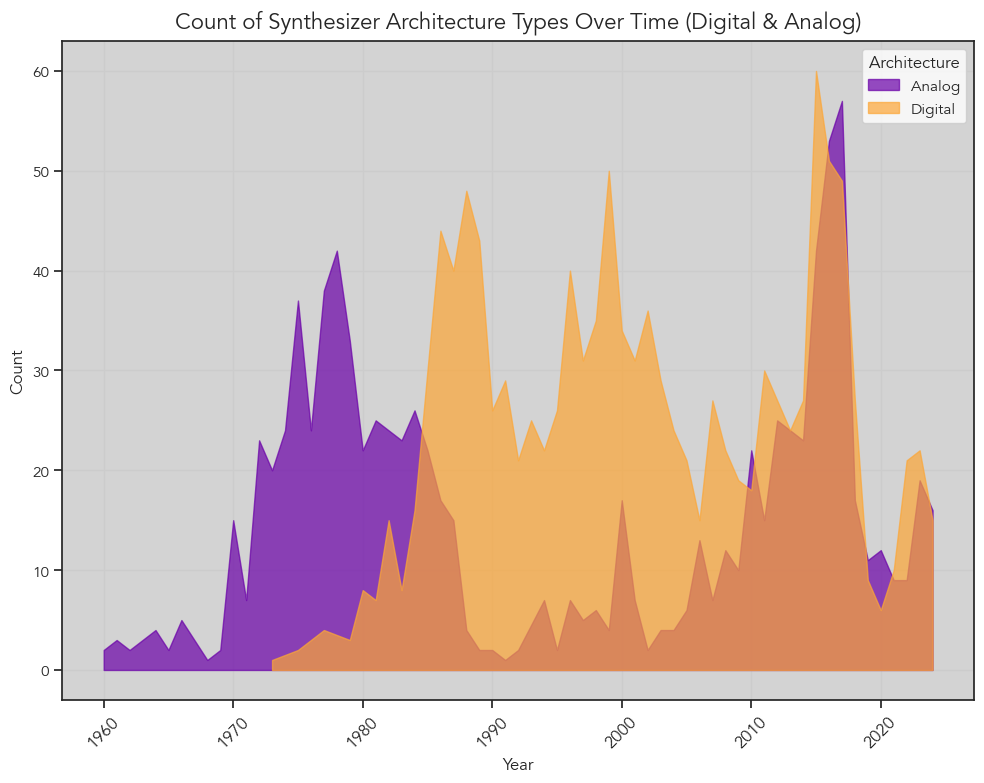

In [48]:
# Filter 
df_filtered = df[(df['Year'] >= 1960) & (df['Architecture'].isin(['Digital', 'Analog']))]

# Group and count
architecture_counts = df_filtered.groupby(['Year', 'Architecture']).size().reset_index(name='Count')

# Set style and plot
sns.set(style="ticks")
plt.figure(figsize=(10, 8))
plt.rcParams['font.family'] = 'Avenir'

# Background color
ax = plt.gca()
ax.set_facecolor('lightgray')  

#colors
plasma = plt.get_cmap('plasma')
color1 = plasma(0.2)  
color2 = plasma(0.8)  

# Plot each architecture
for idx, architecture in enumerate(architecture_counts['Architecture'].unique()):
    subset = architecture_counts[architecture_counts['Architecture'] == architecture]
    
    if idx % 2 == 0:
        color = color1
    else:
        color = color2
    
    # Fill the area under the count for each architecture
    plt.fill_between(subset['Year'], subset['Count'], color=color, alpha=0.7, label=architecture)

# Titles and display
plt.title('Count of Synthesizer Architecture Types Over Time (Digital & Analog)', fontsize=16, pad=10)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Architecture')
plt.xticks(rotation=45, fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

### Between 1990 and 2005, 86% of synthesizers released were digital, while only 14% were analog.

In [52]:
# Filter and count architecture types
counts = df[(df['Year'] >= 1990) & (df['Year'] <= 2005)]['Architecture'].value_counts()

# Get digital and analog counts
digital_count, analog_count = counts.get('Digital', 0), counts.get('Analog', 0)
total_count = digital_count + analog_count

# Calculate percentages
digital_percentage = (digital_count / total_count * 100) if total_count > 0 else 0
analog_percentage = (analog_count / total_count * 100) if total_count > 0 else 0

print(f"{analog_percentage:.2f}% Analog synths")
print(f"{digital_percentage:.2f}% Digital synths")

13.67% Analog synths
86.33% Digital synths


### The earliest digital synth on the dataset 
The earliest digital synth on the list is the **[Coupland Digital Synthesizer](https://en.wikipedia.org/wiki/Coupland_Digital_Music_Synthesizer)** by Micor, although it’s worth noting that it was never officially released. To my knowledge, the first commercially available digital synth was the **[Synclavier](https://en.wikipedia.org/wiki/Synclavier)**, which debuted in 1977

In [19]:
# Filter the DataFrame for synths with Architecture = 'Digital' prior to 1980
digital_synths_before_1980 = df[(df['Year'] < 1980) & (df['Architecture'] == 'Digital')]

# Display the DataFrame
digital_synths_before_1980[['Name', 'Year', 'Architecture']]

,Name,Year,Architecture
98,Micor - Coupland Digital Synthesizer,1973,Digital
177,Fairlight Cmi - Qasar M8 Cmi,1975,Digital
178,Con Brio - Ads 100,1975,Digital
213,Ppg - Wavecomputer 340-380,1977,Digital
217,Ppg - Wavecomputer 360A (B),1977,Digital
239,Cemamu - Upic,1977,Digital
251,New England Digital - Synclavier,1977,Digital
314,Kinetic Systems - Prism,1979,Digital
327,E-Mu - Audity,1979,Digital
342,Fairlight Cmi - Fairlight I,1979,Digital


# Duration

Next, let’s look at duration by filtering the DataFrame to show the five largest duration values. Heading the list with a baffling production run of 60 years is the **[Ondes Martenot](https://en.wikipedia.org/wiki/Ondes_Martenot)**, an early electronic musical instrument. 
It is played with a keyboard or by moving a ring along a wire, creating "wavering" sounds similar to a theremin.
To be fair, only 60 units were made, but this instrument has made its way into many movie soundtracks and even recent big stages, such as those featuring Johnny Greenwood of Radiohead.

However, as exotic as the Ondes Martenot might be, I find the next instrument on the list to be quite surprising: the **[Alesis SR16](https://www.muzines.co.uk/articles/alesis-sr16/7337)**  drum machine. First released in 1990, it is still being produced today. To my knowledge, it is the oldest widely commercially available instrument that you can still buy new. According to my readings online, Alesis even claims it is one of the best-selling drum machines, which makes sense given its extensive production run

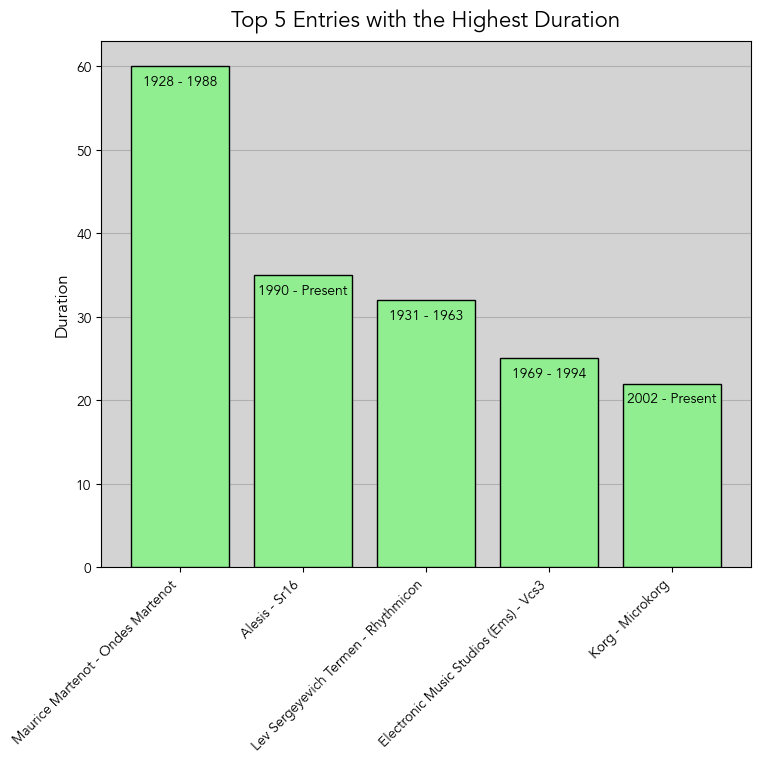

In [13]:
top_5_entries = df.nlargest(5, 'Duration')

# Font
plt.rcParams['font.family'] = 'Avenir'

# Bar plot
plt.figure(figsize=(8, 8))

# Set the background color to light gray
ax = plt.gca()
ax.set_facecolor('lightgray')  # Light gray background

bars = plt.bar(top_5_entries['Name'], top_5_entries['Duration'], color='lightgreen', zorder=3, edgecolor='black')

# Add 'Produced' values 
offset = 1 
for bar, produced in zip(bars, top_5_entries['Produced']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - offset, 
             f"{produced}", ha='center', va='top', rotation=0, fontsize=10)

# Set the grid behind the bars
plt.grid(axis='y', zorder=0)  # Set grid to be in the background
plt.title('Top 5 Entries with the Highest Duration', fontsize=16, pad=10)
plt.ylabel('Duration', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout(pad=2.0)

plt.show()

#### Looking into the count of synthesizers still in production, the dataset contains 463 entries.

Among the synthesizers still in production, we can see the eternal **[MicroKorg](https://en.wikipedia.org/wiki/MicroKORG)**, which has been around for 22 years, the **[Blofeld](https://en.wikipedia.org/wiki/Waldorf_Blofeld)** since 17 years and the **[Vermona Perfourmer MKII](https://www.vermona.com/produkte/synthesizer/produkt/perfourmer-mkii/)**, with a production run of 14 years

In [14]:
df_present = df[df['Produced'].str.endswith('Present', na=False)]
print(df_present.shape)
df_present[['Year', 'Brand', 'Name', 'Device', 'Architecture', 'Produced', 'Duration']].head()

(460, 20)


,Year,Brand,Name,Device,Architecture,Produced,Duration
850,1990,Alesis,Alesis - Sr16,Drum,Digital,1990 - Present,35
1290,2002,Korg,Korg - Microkorg,Synth,Digital,2002 - Present,22
1456,2007,Waldorf,Waldorf - Blofeld,Synth,Digital,2007 - Present,17
1622,2011,Vermona,Vermona Perfourmer Mkii,Synth,Analog,2011 - Present,14
1658,2012,Ferrofish,Ferrofish B4000,Synth,Digital,2012 - Present,13


## Duration over the years

Additionally, I wanted to explore the average production years of synths over time. In this code snippet, I filtered the DataFrame to focus on synths made between 1970 and 2010, allowing me to calculate the average duration for each year. To enhance the accuracy of my analysis, I employed time-weighting. This approach involved calculating the average duration based on the age of each synthesizer, effectively giving more weight to synths that have been around longer. The rationale behind this method is that older synthesizers are likely to have longer shelf lives compared to newer models, which haven't been on the market long enough to accurately reflect their true longevity. 

I opted for polynomial regression because I noticed that the relationship between the production years of synths and their average duration isn’t linear. A second-degree polynomial model helps capture these trends over time by accounting for the fluctuations and variations in duration, providing a more nuanced fit to the data.

I used this model to predict the average duration for 2020 to check if the model was performing as expected. As shown in the graph below, the prediction is fairly accurate. Based on this analysis, I made the prediction that the average shelf life of a synth in 2027 would be 6 years.

In [13]:
current_year = 2024  

# Filter the DataFrame for years between 1970 and 2010
df_filtered = df[(df['Year'] >= 1970) & (df['Year'] <= 2010)].copy()  # Use .copy() to avoid warnings

# Calculate age and weighted duration
df_filtered['Age'] = current_year - df_filtered['Year']
df_filtered['Weighted_Duration'] = df_filtered['Duration'] * df_filtered['Age']

# Group by 'Year' and calculate the time-weighted average duration
avg_duration_per_year = (
    df_filtered.groupby('Year').agg(
        Total_Weighted_Duration=('Weighted_Duration', 'sum'),
        Total_Weight=('Age', 'sum')
    ).reset_index()
)

# Calculate the time-weighted average duration
avg_duration_per_year['Time_Weighted_Avg_Duration'] = (
    avg_duration_per_year['Total_Weighted_Duration'] / avg_duration_per_year['Total_Weight']
)

# Prepare the data 
avg_duration_per_year = avg_duration_per_year.dropna(subset=['Time_Weighted_Avg_Duration'])
x = avg_duration_per_year['Year']
y = avg_duration_per_year['Time_Weighted_Avg_Duration']

# Fit 
p = Polynomial.fit(x, y, deg=2)

# Predict for the year 2020
year_to_predict = 2020
predicted_duration = p(year_to_predict)

print(f"Predicted Time-Weighted Average Duration for {year_to_predict}: {predicted_duration:.2f}")

# Predict durations for the years in the filtered dataset
predicted_durations = p(avg_duration_per_year['Year'])

# metrics
mae = mean_absolute_error(avg_duration_per_year['Time_Weighted_Avg_Duration'], predicted_durations)
mse = mean_squared_error(avg_duration_per_year['Time_Weighted_Avg_Duration'], predicted_durations)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Predicted Time-Weighted Average Duration for 2020: 5.16
Mean Absolute Error (MAE): 0.72
Mean Squared Error (MSE): 0.82
Root Mean Squared Error (RMSE): 0.90


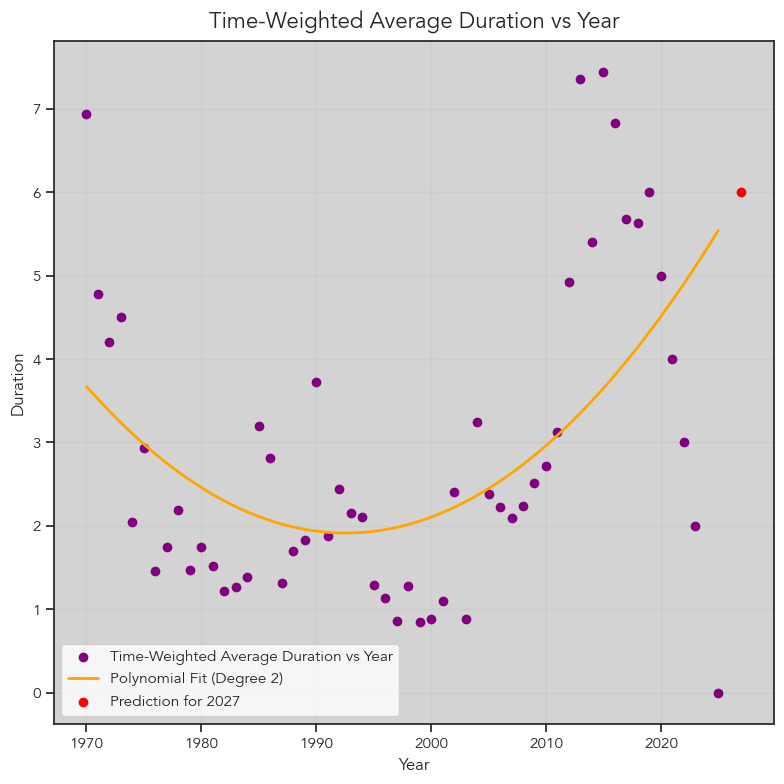

Predicted Time-Weighted Average Duration for 2027: 6.00


In [14]:
current_year = 2024  

# Filter the DataFrame for years above 1970
df_filtered = df[df['Year'] >= 1970].copy()  # Use .copy() to avoid warnings

# Calculate age and weighted duration
df_filtered['Age'] = current_year - df_filtered['Year']
df_filtered['Weighted_Duration'] = df_filtered['Duration'] * df_filtered['Age']

# Group by 'Year' and calculate the time-weighted average duration
avg_duration_per_year = (
    df_filtered.groupby('Year').agg(
        Total_Weighted_Duration=('Weighted_Duration', 'sum'),
        Total_Weight=('Age', 'sum')
    ).reset_index()
)

# Calculate the time-weighted average duration
avg_duration_per_year['Time_Weighted_Avg_Duration'] = (
    avg_duration_per_year['Total_Weighted_Duration'] / avg_duration_per_year['Total_Weight']
)

# Prepare the data 
avg_duration_per_year = avg_duration_per_year.dropna(subset=['Time_Weighted_Avg_Duration'])
x = avg_duration_per_year['Year']
y = avg_duration_per_year['Time_Weighted_Avg_Duration']

# Fit 
p = Polynomial.fit(x, y, deg=2)

# Predict for the year 2027
year_to_predict_2027 = 2027
predicted_duration_2027 = p(year_to_predict_2027)

# Font
plt.rcParams['font.family'] = 'Avenir'
 
# scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(x, y, color='purple', label='Time-Weighted Average Duration vs Year')

x_range = np.linspace(x.min(), x.max(), 100)
y_fit = p(x_range)

# Plot 
plt.plot(x_range, y_fit, color='orange', label='Polynomial Fit (Degree 2)', linewidth=2)
plt.scatter(year_to_predict_2027, predicted_duration_2027, color='red', label='Prediction for 2027', zorder=5)

# title and labels 
plt.title('Time-Weighted Average Duration vs Year', fontsize=16, pad=10)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Duration', fontsize=12)

plt.gca().set_facecolor('lightgray')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

# Print the predicted duration for 2027
print(f"Predicted Time-Weighted Average Duration for 2027: {predicted_duration_2027:.2f}")

# Top Brands by Releases

Looking into the top 10 brands by releases, we see that Roland, Korg, and Yamaha lead the list, which is expected given their strong presence in the music industry. All three brands are well-known for their influential synthesizers and drum machines.

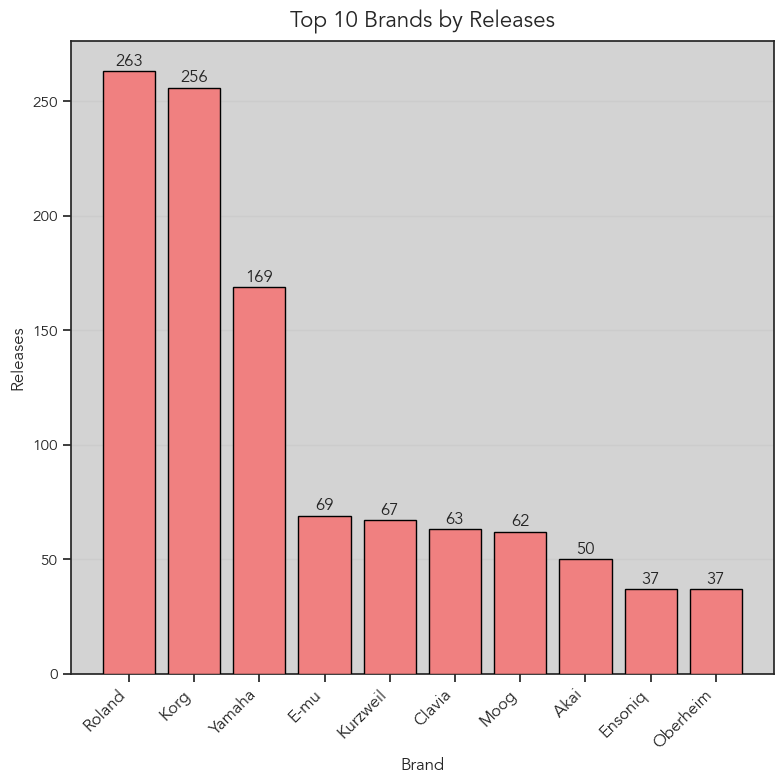

In [57]:
brand_counts = df['Brand'].value_counts().nlargest(10)

# font
plt.rcParams['font.family'] = 'Avenir'

# Bar plot
plt.figure(figsize=(8, 8))

# background color 
ax = plt.gca()
ax.set_facecolor('lightgray')  

bars = plt.bar(brand_counts.index, brand_counts.values, color='lightcoral', zorder=3, edgecolor='black')

# Bar labels 
for bar, count in zip(bars, brand_counts.values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(count), ha='center', va='bottom')


plt.grid(axis='y', zorder=0)  

# title and labels
plt.title('Top 10 Brands by Releases', fontsize=16, pad=10)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Releases', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.tight_layout()
plt.show()

# Polyphony

Looking at the top 10 by polyphony counts, we see a clear trend: significantly more monophonic synths have been released compared to their polyphonic counterparts. Among the polyphonic designs, those with 8 voices are particularly prominent, followed by a variety of even-numbered polyphony combinations. Interestingly, odd-numbered polyphonic synths seem to be much less popular among manufacturers. This may be due to the advantages of even-numbered configurations, which allow for better stereo imaging, harmonious chord distribution, and simpler circuit design

In terms of circuit design, even-numbered voice counts simplify the synthesizer's architecture. Many electronic components are designed for even numbers, facilitating easier signal routing and processing. This can result in more efficient signal flow and reduced circuitry complexity.

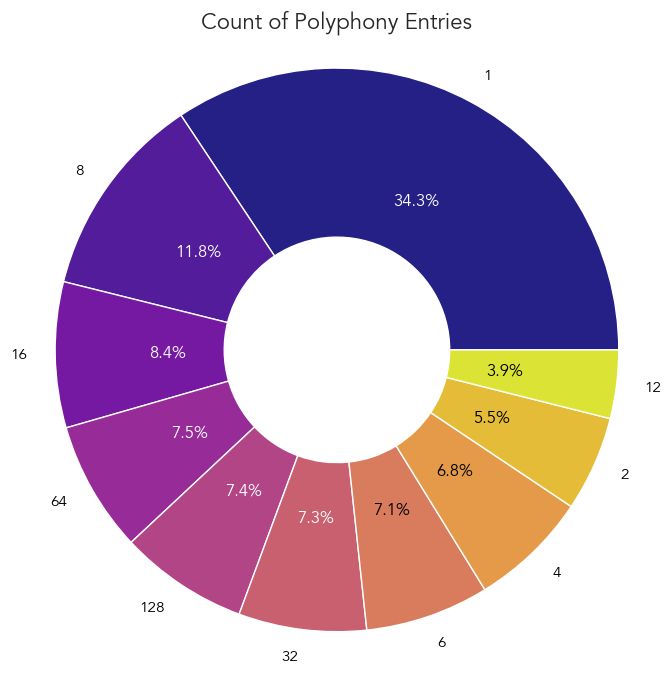

In [60]:
df_filtered = df[df['Polyphony'] != 0]

# Group by 'Polyphony' and count
polyphony_counts = df_filtered['Polyphony'].value_counts().sort_values(ascending=False).head(10)

# font
plt.rcParams['font.family'] = 'Avenir'

# Generate Plasma colormap
colors = plt.cm.plasma(np.linspace(0, 1, len(polyphony_counts))) * 0.9

# Function to determine contrast color
def get_contrast_color(color):
    # Calculate brightness (perceived luminance)
    brightness = 0.299 * color[0] + 0.587 * color[1] + 0.114 * color[2]
    return 'white' if brightness < 0.5 else 'black'

# Create the donut chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(polyphony_counts, labels=polyphony_counts.index.astype(str), 
                                    autopct='%1.1f%%', colors=colors, wedgeprops=dict(width=0.6))

# text color
for i, autotext in enumerate(autotexts):
    autotext.set_color(get_contrast_color(colors[i]))  # Set color based on the corresponding wedge color

for text in texts:
    text.set_color('black')  # Set label text color to black for visibility

plt.title('Count of Polyphony Entries', fontsize=16, pad=10)
plt.axis('equal')  

plt.show()

### Highest Polyphony Counts

Examining the highest polyphony counts, we find the **[ANS synthesizer](https://en.wikipedia.org/wiki/ANS_synthesizer)** at the top of the list. Designed by Russian engineer Evgeny Murzin, the ANS generates sound using drawn spectrograms on glass discs, offering an impressive range of 720 microtones—hence the 720 polyphony—across 10 octaves. Users interact with the instrument by scratching a black coating on a glass plate, allowing light to pass through and create intricate sound patterns. Following this, we see primarily modern entries from the 2000s onward.

In [36]:
df_pol = df.sort_values('Polyphony', ascending=False)
df_pol[['Year', 'Brand', 'Name', 'Device', 'Architecture', 'Polyphony']].head(10)

,Year,Brand,Name,Device,Architecture,Polyphony
15,1957,Evgeny Murzin,Evgeny Murzin - Ans Synthesizer,Synth,Analog,720
2256,2022,Dexibell,Dexibell Vivo Sx 8,Synth,Digital,320
1321,2002,Generalmusic (GEM),Generalmusic (Gem) - Promega 3,Synth,Digital,320
2252,2021,Kodamo,Kodamo Essence Fm Mkii,Synth,Digital,300
2262,2022,Roland,Roland Juno X,Synth,Digital,256
2250,2021,Kurzweil,Kurzweil K2700,Synth,Digital,256
2157,2018,Roland,Roland Ax Edge White,Synth,Digital,256
2208,2019,V3,V3 Sound Sonority Xxl,Synth,Digital,256
1621,2011,Roland,Roland - Jupiter-80,Synth,Digital,256
2279,2022,Roland,Roland Fantom 07,Synth,Digital,256


### Polyphony over the years

Examining the average polyphony distribution over the years reveals an intersting pattern: it peaks in the late 90s and early 2000s. During this time, high polyphony counts were commonly used for multitimbrality, which was essential in pre-computer-based studios. Synthesizers evolved into "workstations," offering comprehensive solutions for music production. Notably, there is a decline in average polyphony around the mid-2010s, even as release numbers peak, which I attribute to the rising popularity of monophonic analog synthesizers.

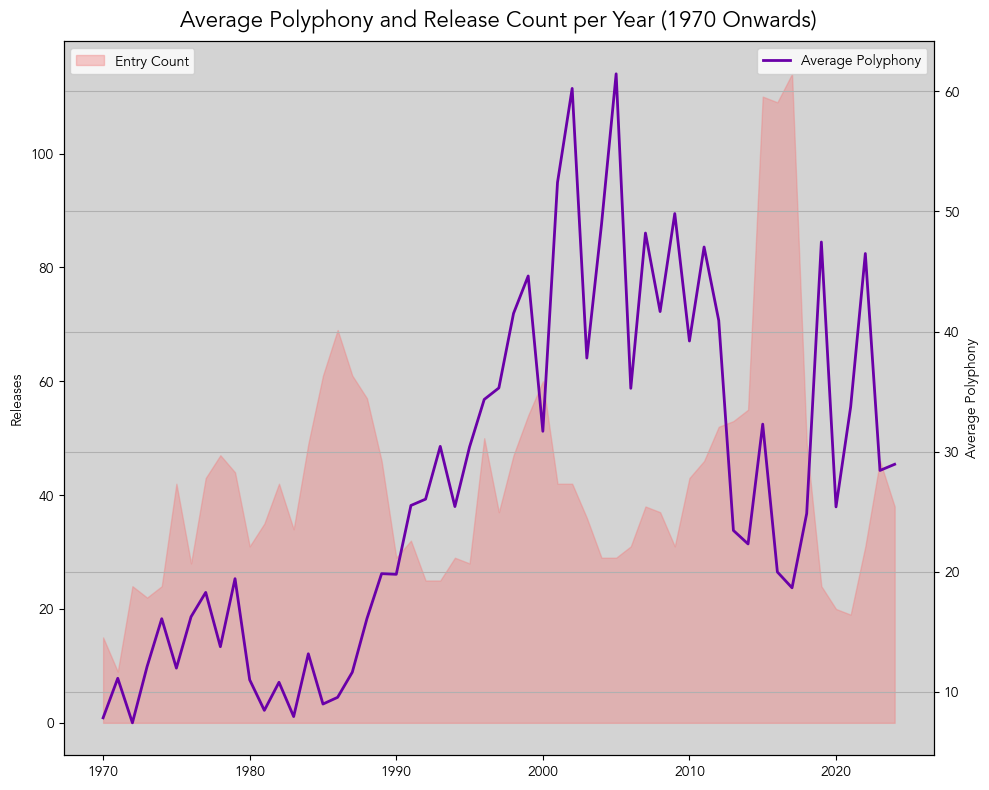

In [61]:
# Font
plt.rcParams['font.family'] = 'Avenir'

# Filter for entries from 1970 onwards
df_filtered = df[df['Year'] >= 1970]

# Average polyphony per year
avg_polyphony = df_filtered[df_filtered['Polyphony'] != 0].groupby('Year')['Polyphony'].mean().reset_index()

# Releases per year
entry_count = df_filtered.groupby('Year')['Name'].count().reset_index(name='Entry Count')

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 8))

# Background color
ax = plt.gca()
ax.set_facecolor('lightgray')

# Releases Area plot
area = ax1.fill_between(entry_count['Year'], entry_count['Entry Count'], color='lightcoral', alpha=0.4, label='Entry Count')
ax1.set_ylabel('Releases', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Plot polyphony
ax2 = ax1.twinx()
line, = ax2.plot(avg_polyphony['Year'], avg_polyphony['Polyphony'], color='#6a00a8', label='Average Polyphony', linestyle='-', linewidth=2)
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Polyphony', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.grid(axis='y')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Average Polyphony and Release Count per Year (1970 Onwards)', fontsize=16, pad=10)
fig.tight_layout()

plt.show()

## Multitimbrality 

The plot below highlights the peak in average multitimbrality during the late 1990s and early 2000s. During this period, multitimbral synthesizers became increasingly popular because they offered a comprehensive solution for producers, enabling them to create complex arrangements with multiple sounds from a single device. This made them especially useful for scoring purposes, as composers could layer different instrument sounds without needing extensive hardware setups. However, this trend began to decline as computers and virtual instruments started to dominate the studio landscape. The rise of digital audio workstations (DAWs) provided producers with more flexible and powerful tools that could naturally replace multitimbral hardware synthesizers, leading to a reduced reliance on these devices​

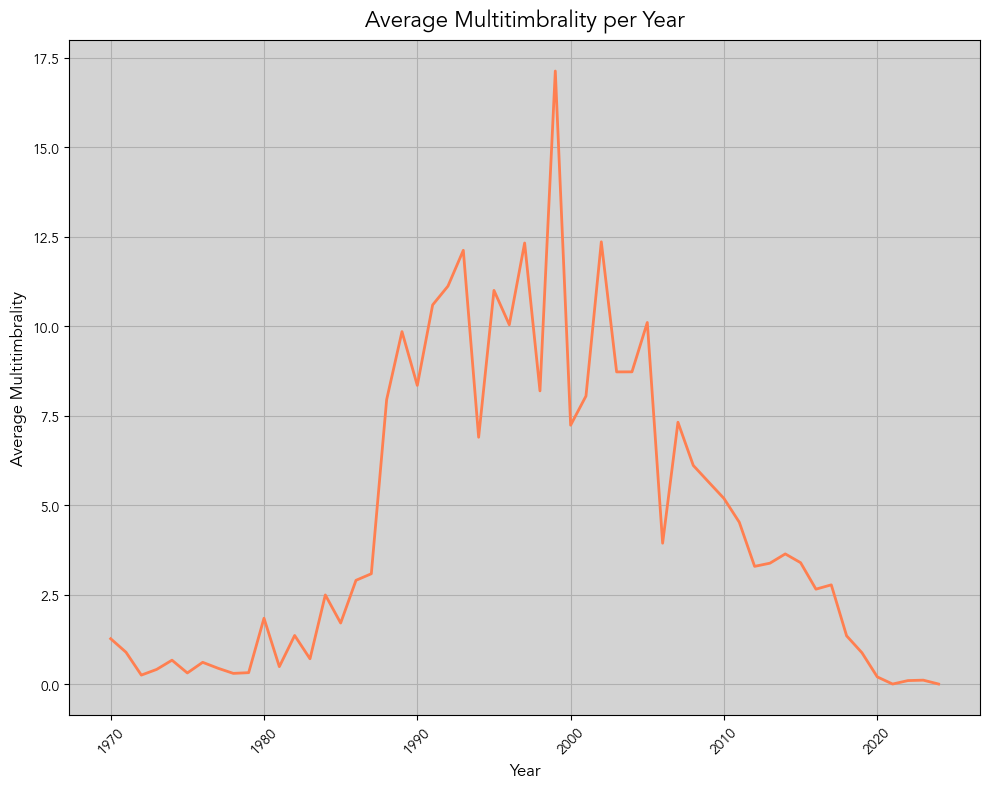

In [62]:
# Font
plt.rcParams['font.family'] = 'Avenir'

# Filter for years from 1970
df_filtered = df[df['Year'] >= 1970]

# Average 'Multitimbral' per year
avg_multitimbral = df_filtered.groupby('Year')['Multitimbral'].mean().reset_index()

# Create the plot
plt.figure(figsize=(10, 8))
ax = plt.gca()
ax.set_facecolor('lightgray')

plt.plot(avg_multitimbral['Year'], avg_multitimbral['Multitimbral'], color='coral', linewidth=2)

# Labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Multitimbrality', fontsize=12)
plt.title('Average Multitimbrality per Year', fontsize=16, pad=10)
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Most Polyphonic and Digital Year

I wanted to investigate which year had the highest percentage of polyphonic releases. The code filters a DataFrame to include entries from 1970 onwards, groups the data by year, and calculates the total number of synthesizers as well as those with polyphony greater than 1. It then computes the percentage of polyphonic synths, identifies the year with the highest percentage, and prints that year along with its percentage.

The resulting year is **1993**, which includes 11 synthesizers with a polyphony of 32 and is notable for being the only year in the dataset with **no analog releases**. It was a remarkable year for digital synthesizers, featuring significant models such as the **[Waldorf Wave](https://www.soundonsound.com/reviews/waldorf-wave)** and the **[E-MU Morpheus](https://www.emumania.net/emu-morpheus-sound-module/)**, among others.

In [14]:
# Filter the DataFrame for years 1970 and onwards
df_filtered = df[df['Year'] >= 1970]

# Group by 'Year' and calculate the percentage of synths with Polyphony > 1
yearly_polyphony = df_filtered.groupby('Year').agg(
    total_synths=('Polyphony', 'size'),
    polyphony_greater_than_1=('Polyphony', lambda x: (x > 1).sum())
)

# Calculate %
yearly_polyphony['percentage'] = (yearly_polyphony['polyphony_greater_than_1'] / yearly_polyphony['total_synths']) * 100

# Find the year with the maximum percentage
max_percentage_year = yearly_polyphony['percentage'].idxmax()
max_percentage_value = yearly_polyphony['percentage'].max()

print(f"The year with the highest percentage of synths with Polyphony > 1 from 1970 onwards is {max_percentage_year} with {max_percentage_value:.2f}%.")

The year with the highest percentage of synths with Polyphony > 1 from 1970 onwards is 1993 with 100.00%.


In [35]:
df93 = df[df['Year']==1993]
df93[['Year', 'Brand', 'Name', 'Device', 'Architecture', 'Polyphony']]

,Year,Brand,Name,Device,Architecture,Polyphony
914,1993,Peavey,Peavey - Dpm Si,Synth,Digital,32
915,1993,Roland,Roland - Jd-990,Synth,Digital,24
916,1993,Quasimidi,Quasimidi - Caruso,Synth,Digital,20
917,1993,Korg,Korg - X3R,Synth,Digital,32
918,1993,Roland,Roland - Jv-90,Synth,Digital,28
919,1993,Ensoniq,Ensoniq - Ts-12,Synth,Digital,32
920,1993,E-mu,E-Mu - Eiiix (S),Sampler,Digital,16
921,1993,Quasimidi,Quasimidi - Quasar,Synth,Digital,21
922,1993,E-mu,E-Mu - Vintage Keys (Plus),Synth,Digital,32
923,1993,Peavey,Peavey - Spectrum Bass,Synth,Digital,8


# Most monophonic and Analog year

After this, I wanted to explore the year with the highest percentage of analog and monophonic synthesizers, which turned out to be 1974. In that year, **100% of the releases were analog**, and **62.5% were monophonic.** The most notable synthesizers from this year include the **Oberheim SEM** and the **Roland System 100M**

In [93]:
# Filter the DataFrame 
df_filtered = df[df['Year'] >= 1970]

# Group by 'Year' and calculate the percentage of synths with Polyphony > 1
yearly_polyphony = df_filtered.groupby('Year').agg(
    total_synths=('Polyphony', 'size'),
    polyphony_greater_than_1=('Polyphony', lambda x: (x == 1).sum())
)

# Calculate the percentage
yearly_polyphony['percentage'] = (yearly_polyphony['polyphony_greater_than_1'] / yearly_polyphony['total_synths']) * 100

# Find the year with the max percentage
max_percentage_year = yearly_polyphony['percentage'].idxmax()
max_percentage_value = yearly_polyphony['percentage'].max()

print(f"The year with the highest percentage of synths with Polyphony > 1 from 1970 onwards is {max_percentage_year} with {max_percentage_value:.2f}%.")

The year with the highest percentage of synths with Polyphony > 1 from 1970 onwards is 1974 with 62.50%.


In [94]:
df74 = df[df['Year']==1974]
df74[['Year', 'Brand', 'Name', 'Device', 'Architecture', 'Polyphony']]

,Year,Brand,Name,Device,Architecture,Polyphony
115,1974,ARP,Arp - Explorer 1,Synth,Analog,1
116,1974,Sequential Circuits,Sequential Circuits - Model 600,Synth,Analog,1
117,1974,Roland,Roland - Sh-3A,Synth,Analog,1
118,1974,Roland,Roland - System 100M,Synth,Analog,1
119,1974,PAiA,Paia - Gnome,Synth,Analog,1
120,1974,ARP,Arp - Solina String Ensemble,Synth,Analog,49
121,1974,PAiA,Paia - Stereo Chord Egg,Misc,Analog,0
122,1974,Yamaha,Yamaha - Sy-1,Synth,Analog,1
123,1974,Maplin,Maplin - Eti 4600,Synth,Analog,1
124,1974,Korg,Korg - Minikorg-700,Synth,Analog,1


# Synthesizer Names

Next, I wanted to explore how synthesizers are named. The code removes brand names from a list of synthesizer names, counts the remaining words, and creates a square treemap of the top 30 most common words. Ignoring "Nord," which is linked to the 63 Clavia instruments in the dataset, I noticed the frequent appearance of "2" and "II," prompting me to investigate how many synthesizers had sequels. Filtering the dataset for entries containing "2" or "MK" revealed 192 entries, accounting for **8.1%** of the dataset.

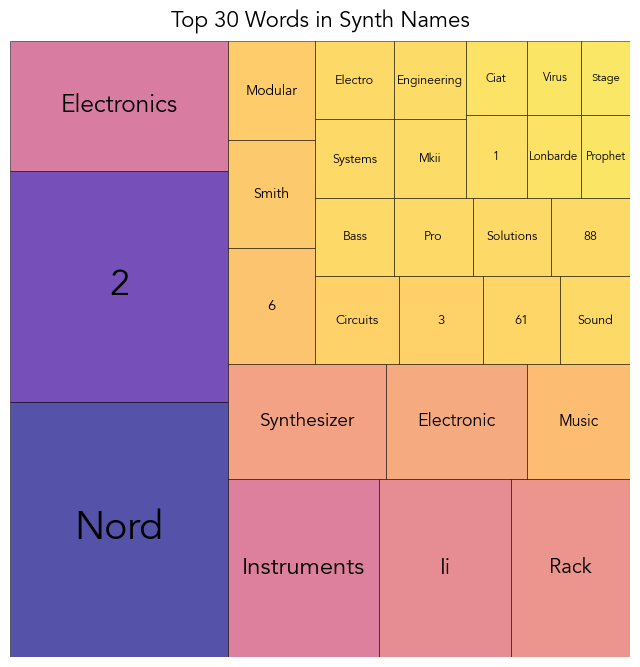

In [91]:
# Font
plt.rcParams['font.family'] = 'Avenir'

# Exclude brands from names
exclude_words = set(df['Brand'].dropna().str.lower())
filtered_words = []

# Filter words from names
for name in df['Name']:
    words = name.split()
    filtered_words.extend([
        word for word in words 
        if word.lower() not in exclude_words and re.match(r'^[A-Za-z0-9]+$', word)
    ])

# Count occurrences and prepare data
word_counts = Counter(filtered_words)
top_words = word_counts.most_common(30)
words, counts = zip(*top_words)
counts = np.array(counts) ** 2  
colors = plt.cm.plasma_r(counts / counts.max())  # Reverse Plasma

# Create figure and treemap
plt.figure(figsize=(8, 8))
squarify.plot(sizes=counts, color=colors, alpha=0.7, edgecolor='black', linewidth=0.5)

# Font sizes 
ax = plt.gca()

# Define font size scaling function
def scale_font_size(count, min_size=8, max_size=28, min_count=min(counts), max_count=max(counts)):
    return min_size + (count - min_count) / (max_count - min_count) * (max_size - min_size)

for i, (label, size) in enumerate(zip(words, counts)):
    x, y, width, height = ax.patches[i].get_x(), ax.patches[i].get_y(), ax.patches[i].get_width(), ax.patches[i].get_height()
    fontsize = scale_font_size(size)
    plt.text(x + width / 2, y + height / 2, label, ha='center', va='center', fontsize=fontsize)

plt.title('Top 30 Words in Synth Names', fontsize=16, pad=10)
plt.axis('off')
plt.show()

# 8.1% of the synths in the data set have a Sequel

In [6]:
# Filter 
sequel_df = df[df['Name'].str.contains(r'\b2\b|ii|mk', case=False, na=False)]
name_list = sequel_df ['Name'].tolist()
sequel_count = sequel_df.shape[0]

total_count = df.shape[0]

percentage = (sequel_count / total_count) * 100

# Print the results
print(f"Entry count of sequel_df: {sequel_count}")
print(f"Entry count of df: {total_count}")
print(f"Percentage of sequel_df from df: {percentage:.2f}%")

#Uncomment to view synths that have a sequel
#print(name_list) 

Entry count of sequel_df: 192
Entry count of df: 2368
Percentage of sequel_df from df: 8.11%


# Fame

"Fame" is a parameter I've developed using a formula that assesses popularity by combining several factors. The score is calculated based on the presence of official websites, social media links, and music-related sites, with specific points awarded for each identified link. Additionally, the score considers the number of search results and incorporates a similarity score obtained from the Wikipedia API, reflecting how closely related a synthesizer is to existing Wikipedia entries. It also takes into account the presence of news articles and reviews, further enhancing the assessment of each synth's impact in the music community. This combination of factors ultimately quantifies the online presence and relevance of each synthesizer, providing a comprehensive measure of its popularity in the music community. 

Looking into the top 10, we can immediately see that the highest "Fame" scores are dominated by analog synthesizers from the 70s and 80s, with the **[TR-808 drum machine](https://en.wikipedia.org/wiki/Roland_TR-808)** topping the list, followed by the **[Minimoog](https://en.wikipedia.org/wiki/Minimoog)** and the **[TB-303](https://en.wikipedia.org/wiki/Roland_TB-303)**. If you’ve been in the music technology scene for a while, you might feel that this top 10 list is self-evident. However, for me, one of the most beautiful aspects of data science is its capacity to validate existing knowledge while also revealing new insights and patterns.

In [95]:
df_fame = df.sort_values('Fame', ascending = False)
df_fame[['Year', 'Brand', 'Name', 'Device', 'Architecture', 'Fame']].head(10)

,Year,Brand,Name,Device,Architecture,Fame
386,1981,Roland,Roland - Tr-808,Drum,Analog,1.000000
49,1970,Moog,Moog - Minimoog,Synth,Analog,0.990286
418,1982,Roland,Roland - Tb-303,Synth,Analog,0.947888
460,1983,Roland,Roland - Sh-101,Synth,Analog,0.918900
425,1982,Roland,Roland - Juno-60,Synth,Analog,0.915866
392,1981,Oberheim,Oberheim - Ob-Xa,Synth,Analog,0.887227
452,1983,Yamaha,Yamaha - Dx7,Synth,Digital,0.867507
259,1978,Korg,Korg - Ms-20,Synth,Analog,0.861803
527,1984,Roland,Roland - Juno-106,Synth,Analog,0.861718
210,1977,Yamaha,Yamaha - Cs80,Synth,Analog,0.828643


## Fame per type

Breaking "Fame" into architecture types, we see the DX7 leading the digital synths, the wonderful OSCar at the forefront of the hybrid synths, and the quirky MC-300 sequencer leading the miscellaneous category. Each of these iconic pieces holds its place at the top in their respective groups

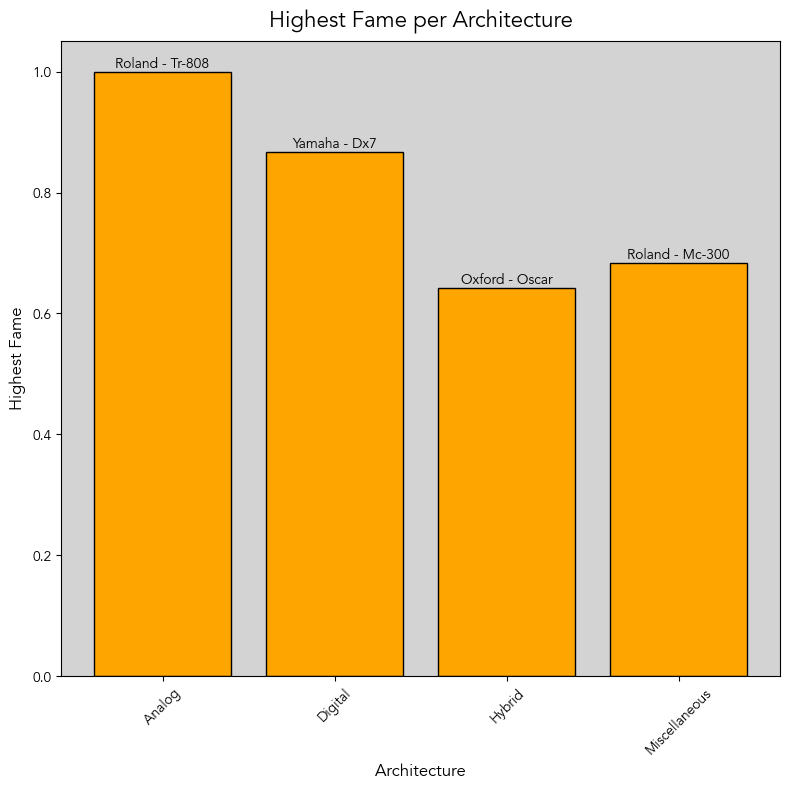

In [96]:
# Fame per Architecture
highest_fame = df.loc[df.groupby('Architecture')['Fame'].idxmax()][['Architecture', 'Fame', 'Name']]

#Font
plt.rcParams['font.family'] = 'Avenir'

# Plot
plt.figure(figsize=(8, 8))
ax = plt.gca()
ax.set_facecolor('lightgray')  # Set background color
plt.bar(highest_fame['Architecture'], highest_fame['Fame'], color='orange', edgecolor='black')

# Bar Labels
for i in range(len(highest_fame)):
    plt.text(i, highest_fame['Fame'].iloc[i], highest_fame['Name'].iloc[i], ha='center', va='bottom', fontsize=10, fontname='Avenir')

# Labels and title
plt.xlabel('Architecture', fontsize=12)
plt.ylabel('Highest Fame', fontsize=12)
plt.title('Highest Fame per Architecture', fontsize=16, pad=10)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Fame vs actual sales

Fame should not be confused with popularity in the context of sales figures. In fact, I would argue that synthesizers released in smaller quantities and that are harder to obtain often attain a cult status. While a synthesizer may achieve significant recognition within the music community, this does not always translate to high sales numbers. To illustrate this point, I have compiled a small DataFrame that includes the known sales figures for 35 synthesizers. Among these entries is the Korg Triton, which stands out as the best-selling synthesizer I am aware of. This analysis clarifies the distinction between a synthesizer's reputation and its actual market performance

In [15]:
# Data for the synthesizers, sources: Wikipedia, Gearspace, Kvr, Sweetwater
data = {
    'Name': ['EMS Synthi 100', 'Crumar Spirit', 'Fairlight CMI', 'E-MU Emulator', 'PPG Wave 2.3', 
             'Oberheim 4 Voice', 'OSCar', 'kawai - sx-240', 'Synclavier', 'Roland Jupiter 8', 
             'Yamaha CS80', 'Kurzweil 250', 'Rhodes Chroma', 'E-MU Emulator II', 'Korg Oasys', 
             'E-MU Emulator III', 'ARP Omni', 'Sequential Circuits Prophet 5', 'Korg Mono/Poly', 
             'Sequential Circuits Pro One', 'Moog - Minimoog', 'Korg Wavestation', 'Korg MS-20', 
             'Akai S1000', 'Korg Polysix', 'Ensoniq Mirage', 'Roland Juno 106', 'Ensoniq Esq1', 
             'Roland SH-101', 'Korg Poly800', 'Korg 01/W', 'Yamaha DX7', 'Roland D50', 
             'Korg M1', 'Korg Triton'],
    
    'Sold': [34, 100, 300, 500, 700, 
             800, 2000, 1000, 1600, 2000, 
             850, 3000, 3000, 3000, 3000, 
             3200, 4000, 8000, 10000, 10000, 
             13000, 14000, 20000, 22000, 30000, 
             30000, 40000, 50000, 50000, 100000, 
             100000, 160000, 200000, 250000, 300000],

    'Fame': [0.159089082850423, 0.5422782503188586, 0.5267252888765711, 0.2849024381529835, 
             0.5769985327411191, 0.3688036678458943, 0.60981423341011, 0.2093605683382621,
             0.3377717921693748, 0.7158822800127399, 0.828642659102052, 0.7743186800452001,
             0.7027510361479484, 0.5364612245403346, 0.2877486592776719, 0.3983431342768326,
             0.4267688394327832, 0.8170785660891338, 0.7970491607861364, 0.3354775380771948,
             0.9902862049821092, 0.5118346098282753, 0.8618032095224291, 0.4894027452299969, 
             0.5846130223470267, 0.3786361374338713, 0.8617181423605822, 0.4925829857512558, 
             0.918899648799205, 0.7900385457992851, 0.497947027708753, 0.8675073945604589, 
             0.5843911224386217, 0.6370634512423423, 0.6545218339478499]  
}

dfs = pd.DataFrame(data)

Upon examining the plot below, a distinct pattern emerges regarding the sales performance of synthesizers from a contemporary perspective. The three best-selling models—the **[Korg Triton](https://en.wikipedia.org/wiki/Korg_Triton)**, **[Korg M1](https://de.wikipedia.org/wiki/Korg_M1)**, and **[Roland D-50](https://en.wikipedia.org/wiki/Roland_D-50)** were released in the late 1980s and 1990s and all occupy the medium fame range.

This observation prompts a closer look at the relationship between fame and sales, suggesting that these synthesizers achieved significant commercial success without necessarily being regarded as groundbreaking or iconic in today’s music landscape. While the D-50 was quite innovative and has gained recent recognition for its unique sound and capabilities, the success of the Triton and the M1 can be attributed to their roles as reliable workhorses and their ability to provide complete production solutions. Their comprehensive features and user-friendly interfaces made them popular choices among musicians and producers, allowing for efficient music production without the need for additional equipment.

Interestingly, the **[Yamaha DX7](https://en.wikipedia.org/wiki/Yamaha_DX7)** stands out as a possible exception to this trend, as it boasts very high fame and ranks as the fourth best-selling synth on the list. Its significant impact on the music industry, particularly in the 1980s, cemented its place as a legendary instrument, making it a key point of reference in discussions about synthesizers.

Furthermore, the analysis shows that synthesizers with high fame, such as the **[Minimoog](https://de.wikipedia.org/wiki/Moog_Minimoog)**, **[Korg MS-20](https://en.wikipedia.org/wiki/Korg_MS-20)**, **[Roland SH-101](https://en.wikipedia.org/wiki/Roland_SH-101)**, and **[Juno-106](https://en.wikipedia.org/wiki/Roland_Juno-106)**, all sold fewer than 50,000 units. Notably, the Minimoog, the most popular among these, reached only 13,000 produced units and sales. This limited production, combined with their unique characteristics and iconic sounds, has likely contributed to their elevated fame ratings. The unique features and musical contributions of these models have given them a cult status in the music community, enhancing their reputation in synthesizer history.

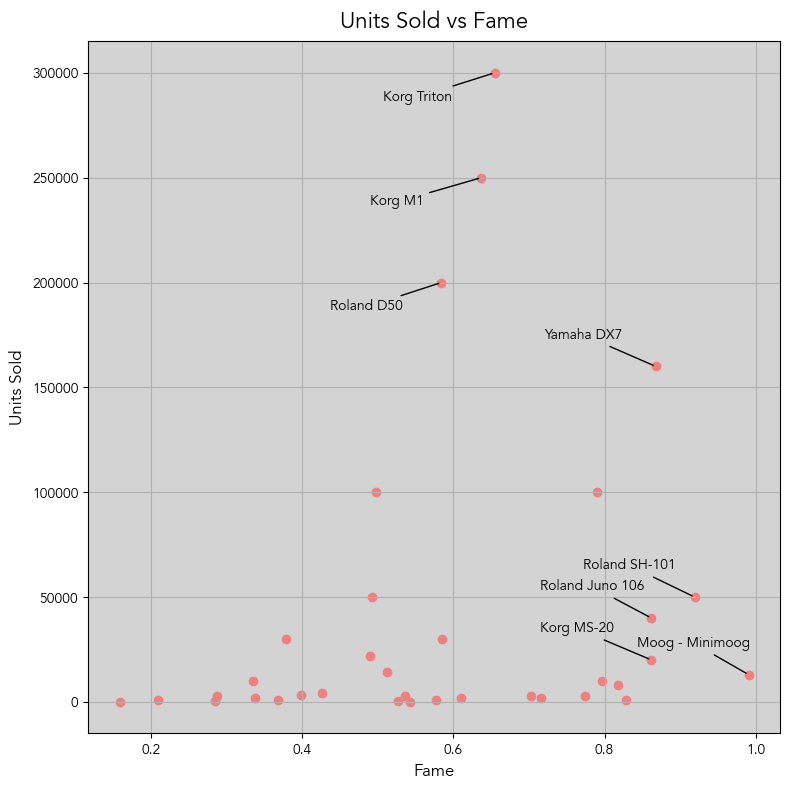

In [16]:
#Font
plt.rcParams['font.family'] = 'Avenir'

# Create the figure and axis for the scatter plot
fig, ax = plt.subplots(figsize=(8, 8))

# background color
ax.set_facecolor('lightgray')

# Scatter plot for 'Sold' vs 'Fame'
ax.scatter(dfs['Fame'], dfs['Sold'], color='lightcoral')

# Add title and labels
ax.set_title('Units Sold vs Fame', fontsize=16, pad=10)
ax.set_xlabel('Fame', fontsize=12)
ax.set_ylabel('Units Sold', fontsize=12)

top_fame_indices = dfs['Fame'].nlargest(5).index
top_sold_indices = dfs['Sold'].nlargest(3).index

highlighted_indices = top_fame_indices.union(top_sold_indices)

# Add annotations 
for idx in highlighted_indices:
    if idx in top_sold_indices:  # For top 3 Sold
        xytext_offset = (-80, -20)  # Left and down offset
    else:  # For the rest
        xytext_offset = (-80, 20)  # Left and up offset
    
    ax.annotate(
        dfs['Name'].iloc[idx], 
        xy=(dfs['Fame'].iloc[idx], dfs['Sold'].iloc[idx]), 
        xytext=xytext_offset,  
        textcoords='offset points',  
        arrowprops=dict(arrowstyle="-", lw=1, color='black'),  
        fontsize=10, 
        fontname='Avenir'
    )


plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

## Iftah Gabbai, 2024.

**[Instagram](https://www.instagram.com/iftah.gabbai/)**

**[LinkedIn](https://www.linkedin.com/in/iftah-gabbai-4588a42b6/)**

**[Youtube](https://www.youtube.com/@iftah_fow)**

**[GitHub](https://github.com/iftah-og)**